In [1]:
from TimeDelay_Neuron_DDF_GaussianForm import *
import numpy as np
import time
import matplotlib.pyplot as plt
import random
import copy
random.seed()
np.random.seed()

In [2]:
# modify this
use_neuron_index = 3
neuron_txt_filename = 'Episode_2_voltage.txt'
epoch = None # also called "episode". set to None if not specified
neuron_directory = "Nogaret_HVCx_model_I(t)_and_V(t)"
cutoff_tstep = 103000

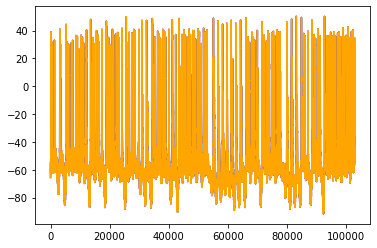

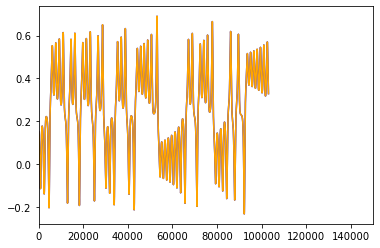

In [3]:
# ======== do not modify below ==========
V_filename_pretext = "Nogaret_V(t)_Response_to_I_L63_x_time_dilation=1.0range=300_(I)"
I_filename_pretext = "I_L63_x_time_dilation=1.0range=700_(I)_converted_units"
Voltage_train = np.loadtxt(neuron_directory+"/"+V_filename_pretext+'.txt')[:cutoff_tstep,1]
Current_train = np.loadtxt(neuron_directory+"/"+I_filename_pretext+'.txt')[:cutoff_tstep,1]
Voltage_test = np.loadtxt(neuron_directory+"/"+V_filename_pretext+'.txt')[:cutoff_tstep,1]
Current_test = np.loadtxt(neuron_directory+"/"+I_filename_pretext+'.txt')[:cutoff_tstep,1]

plt.figure()
plt.plot(Voltage_train, color='blue')
plt.plot(Voltage_test, color='orange')
plt.show()
plt.figure()
plt.plot(Current_train, color='blue')
plt.plot(Current_test, color='orange')
plt.xlim((0,150000))
plt.show()

In [ ]:
for tau in [3,6,10]:
    for D in range(2,20):
        print("tau,D:"+str((tau,D)))
        length = 50000
        Xdata = Voltage_train
        TT = 0.02 #ms
        NoCenters_no_thresh = 2000
        # NoCenters_above_thresh = 1000
        DDF = Gauss()
        # Combine centers above threshold with centers determined by kmeans
        Centers_k_means = DDF.KmeanCenter(Xdata,NoCenters_no_thresh,D,length,tau);
        temp_array = copy.deepcopy(Xdata)
        temp_array[temp_array<-50]=-100
        # Centers_above_thresh = DDF.KmeanCenter(temp_array,NoCenters_above_thresh,D,length,tau);
        # Center = np.concatenate((Centers_k_means,Centers_above_thresh),axis=0)
        Center = Centers_k_means

        print("C_km:"+str(Centers_k_means.shape))
        # times_where_V_gt_n75 = train_t_ind_arr[V_Train_delayed[0]>=-40]
        # V_Train_delayed_add = V_Train_delayed[:,(times_where_V_gt_n75-train_t_ind_arr[0])] # important to subtract train_t_ind_arr[0] (time training index vs total time index of V delayed array)
        # Centers_above_thresh = DDF.KmeanCenter(Xdata[Xdata>-50],100,D,length,tau);


        print("temp_arry:"+str(temp_array))
        # plt.figure()
        # plt.plot(temp_array)
        # plt.show()
        # print("C_at:"+str(Centers_above_thresh.shape))

        NoCenters = np.shape(Center)[0]
        print(NoCenters)
        print("Centers:"+str(Center.shape))
        np.savetxt('centers/Center '+neuron_txt_filename[:-4]+'.txt',Center)
        Center = np.loadtxt('centers/Center '+neuron_txt_filename[:-4]+'.txt')
        # Center = np.load('Example/Centers_train25k_5k_D'+str(D)+'_tau'+str(tau)+'.npy')

        stim_train = Current_train
        Pdata = Voltage_test
        PreLength = 50000
        beta_arr,R_arr = [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-4,1e-3,1e-2,1e-1],[1e-7,1e-6,1e-5,1e-4,1e-3,1e-3,1e-2,1e-1,1e0]#[1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1]#[10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2],[10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2]#,[10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3]
        bias = 50 # should be larger than tau*(D-1) or something like that
        X = np.arange(bias,bias+PreLength*TT,TT)
        stim_test = Current_test

        for beta in beta_arr:
            for R in R_arr:
                # beta = 10e0
                # R = 10e-4
                title = neuron_txt_filename[:-4]+' with 0.02ms time step, D = '+str(D)+', Beta = '+str("{:.1e}".format(beta))+', R = '+str("{:.1e}".format(R))+' Train Time = '+str(PreLength)+', Centers = '+str(NoCenters)+', tau = '+str(tau)
                print(R)
                F = DDF.FuncApproxF(Xdata,length,Center,beta,R,D,stim_train,tau)
                PredValidation = DDF.PredictIntoTheFuture(F,PreLength,stim_test[bias-1:],Pdata[bias-1-(D-1)*tau:])
                # Tau8
                plt.figure(figsize=(20,10))
                plt.plot(X,Pdata[bias:bias + PreLength],label = 'True Voltage', color = 'black')
                plt.plot(X,PredValidation[tau*(D-1)+1:tau*(D-1)+PreLength+1],label = 'Prediction', color = 'r')
                plt.xlabel('time (ms)',fontsize=20)
                plt.ylabel('Voltage(mV)',fontsize=20)
                plt.legend()
                plt.title(title,fontsize=20)
                #plt.savefig('Validation Prediction Result')
                plt.savefig('Nogaret_RBF/'+title+'.png')
                plt.show

tau,D:(3, 2)
C_km:(2000, 2)
temp_arry:[-100.         -100.         -100.         ...   18.23029215   20.8489636
   21.48253973]
2000
Centers:(2000, 2)
1e-07
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
1e-06
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
1e-05
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
0.0001
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
0.001
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
0.001
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
0.01
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
0.1
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


0.0001
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
0.001
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
0.001
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
0.01
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
0.1
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
1.0
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
1e-07
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
1e-06
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
1e-05
Length+1: 50001
Shape of Xdata: (103000,)
Shape of XTau: (2, 50001)
Sample Xdata over length:(3, 50004)
0.0001
Length+

In [ ]:
plt.plot(Voltage_train[:100000])
plt.plot(Pdata[0:180000])
plt.show()
plt.figure()
plt.plot(np.sort(DDF.W))
plt.title("RBF Coefficients (Sorted)")
plt.xlabel('Index (Sorted)')
plt.ylabel("RBF Coefficient Value")
plt.show()
plt.figure()
plt.plot(np.sort(Center[:,0]))
plt.title("Centers")
plt.xlabel("Sorted centers index")
plt.ylabel("Voltage")
plt.show()

# plt.show()
# plt.figure()
# color_vals = (np.roll(Center,-1)-Center)[:,0]
# plt.title("Sorted color values")
# color_vals[color_vals<-20] = 0
# color_vals[color_vals>5] = 0
# plt.plot(np.sort(color_vals))
# plt.show()

plt.scatter(Center[:,0],DDF.W[:-1])
plt.title("Weight as a function of center voltage (unsure)")
plt.xlabel("Center voltage")
plt.ylabel("Weight (Coeff of RBF)")
plt.show()

In [ ]:
plt.plot(Current_train[:100000])
plt.plot(Current_test[0:180000])

In [ ]:
print("{:.1e}".format(15.000002))